

## The stock market has seen a rise in instability, making this a prime time to put machine learning techniques to the test in forecasting its future trends. As the adage goes, 'we may not be able to predict the future, but we can always be prepared.' Keeping this in mind, I embarked on a journey to construct a model that would assist us in being better prepared for the stock market's future movements.

## The objective of this project is to use machine learning techniques to predict the near-future trends of the stock market. The project seeks to gain understanding into the future movements of the stock market by utilizing technical indicators as features and binary target values indicating the rise or fall of stock prices within a determined time frame. 

## The limitations of the project include but not limited to:

## The accuracy of predictions being subject to the quality and quantity of data.
## The stock market being a complex system, susceptible to unpredictable factors.
## The project's scope being limited to a particular set of stocks or a certain time frame.

==================================================================================================================================================================================

To start off, I have included all the necessary libraries for this project. The yfinance API was utilized to gather historical stock market data(S&P 500), which is directly sourced from the Yahoo Finance website, ensuring the reliability of the data. The size of the data is basically 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import seaborn as sns
import datetime
from finta import TA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import tensorflow as tf

import xgboost as xgb


data = yf.download(tickers = '^GSPC', start = '2005-01-03',end = '2023-02-08')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03 00:00:00-05:00,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04 00:00:00-05:00,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05 00:00:00-05:00,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06 00:00:00-05:00,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07 00:00:00-05:00,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000
2005-01-10 00:00:00-05:00,1186.189941,1194.780029,1184.800049,1190.250000,1190.250000,1490400000
2005-01-11 00:00:00-05:00,1190.250000,1190.250000,1180.430054,1182.989990,1182.989990,1488800000
2005-01-12 00:00:00-05:00,1182.989990,1187.920044,1175.640015,1187.699951,1187.699951,1562100000
2005-01-13 00:00:00-05:00,1187.699951,1187.699951,1175.810059,1177.449951,1177.449951,1510300000


In [41]:
test=pd.read_csv(r'C:\Users\pedro\OneDrive\Desktop\DATA SCIENCE\Alumno\3-Machine_Learning\Entregas\ML_project\src\test.csv')
test

,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,pred
0,66.165249,26.379980,27.383448,68.380307,1.278051e+12,16.722644,3.693180,79.477753,0.894259,1.438379e+12,74.268313,0.013781,0.790641,1.182181,1.028808,1.025301,1.017966,1.001690,1.045778,1.0
1,68.900507,25.568870,27.020533,79.353901,1.280092e+12,16.961294,12.251524,79.473653,0.854556,1.442199e+12,77.408445,0.011076,0.829712,1.151947,1.032666,1.028424,1.020923,1.005081,1.009630,1.0
2,61.278569,23.611201,26.338666,46.605269,1.279483e+12,17.283001,7.668081,72.177980,-0.008984,1.438391e+12,46.164653,0.004662,0.895096,1.082099,1.025667,1.020959,1.013543,0.998985,1.005286,1.0
3,60.816458,21.742595,25.419452,44.809866,1.278490e+12,17.754949,10.262851,64.132699,-0.072918,1.434874e+12,39.865439,0.002463,0.941309,1.028031,1.024747,1.019596,1.012249,0.998819,0.939562,1.0
4,58.546382,19.716909,24.278943,36.237898,1.275873e+12,18.397418,6.802960,56.669222,0.142512,1.431325e+12,29.684401,0.001713,0.956132,1.005009,1.022322,1.016822,1.009611,0.997415,0.956697,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,51.194229,13.844449,1.933637,55.819566,2.037622e+12,56.506311,72.431212,72.213112,2.082213,2.431050e+12,60.840911,0.120951,0.863933,1.143708,1.000224,1.003442,1.002232,0.997752,1.002330,1.0
1711,56.001489,15.201904,4.587291,72.598394,2.040034e+12,57.306082,132.282431,72.758634,3.250991,2.435089e+12,70.398065,0.114558,0.858642,1.123052,1.009286,1.012136,1.010726,1.005809,0.992438,1.0
1712,60.958664,19.550912,7.580015,92.030602,2.041957e+12,58.893437,127.373338,78.433147,3.954010,2.439066e+12,110.632701,0.176020,0.793239,1.175576,1.019949,1.022157,1.020328,1.013994,0.981229,1.0
1713,62.361243,23.797700,10.823552,95.087305,2.043860e+12,57.127583,125.739579,78.464965,4.945424,2.442617e+12,114.354277,0.179490,0.805761,1.220787,1.022879,1.024373,1.022111,1.014436,0.894334,1.0


The inclusion of technical indicators into the data frame is a vital aspect of this project as it enhances the information available and sheds light on the behavior of the stock market. Technical indicators are mathematical computations that consider the price and/or volume of an asset. By including these indicators in the data, the project has access to more information that can improve the accuracy of its predictions.

The particular technical indicators added in this code, such as the Relative Strength Index (RSI) and the Exponential Moving Average (EMA), are widely used in stock market analysis and offer different perspectives on the stock's momentum, trend, and volatility. The integration of these indicators as features in the modeling process can identify important patterns and relationships in the data that may not be visible with just the stock's price and volume information.

By incorporating technical indicators into the data frame, the project can achieve a broader understanding of the stock market's behavior and make more informed predictions about its future trends.

A common operation in time series is to move all data points one or more periods backward or forward to compare past and future values

In [42]:
# Añadiendo indicadores
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
#data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [43]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,2005-08-05 00:00:00-04:00,1235.859985,1235.859985,1225.619995,1226.420044,1226.420044,1930280000,51.183214,1229.393696,1204.801748,1193.244597,-3.290039,0,1223.130005
1,2005-08-08 00:00:00-04:00,1226.420044,1232.280029,1222.670044,1223.130005,1223.130005,1804140000,49.235860,1228.797154,1205.164684,1193.640430,8.250000,1,1231.380005
2,2005-08-09 00:00:00-04:00,1223.130005,1234.109985,1223.130005,1231.380005,1231.380005,1897520000,53.943707,1229.043140,1205.683799,1194.140292,-2.250000,0,1229.130005
3,2005-08-10 00:00:00-04:00,1231.380005,1242.689941,1226.579956,1229.130005,1229.130005,2172320000,52.520443,1229.051412,1206.148080,1194.603732,8.680054,1,1237.810059
4,2005-08-11 00:00:00-04:00,1229.130005,1237.810059,1228.329956,1237.810059,1237.810059,1941560000,57.189198,1229.885569,1206.775050,1195.176001,-7.420044,0,1230.390015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,2023-01-31 00:00:00-05:00,4020.850098,4077.159912,4020.439941,4076.600098,4076.600098,4679320000,61.414833,3981.197495,3932.715051,3961.109821,49.139893,1,4119.209961
4402,2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4856930000,64.440196,3994.341539,3936.408020,3963.203862,21.079590,1,4179.759766
4403,2023-02-02 00:00:00-05:00,4158.680176,4195.439941,4141.879883,4179.759766,4179.759766,5624360000,68.232523,4012.000418,3941.226866,3966.072152,-0.209961,0,4136.479980
4404,2023-02-03 00:00:00-05:00,4136.689941,4182.359863,4123.359863,4136.479980,4136.479980,4694510000,63.080508,4023.855615,3945.093265,3968.329210,-8.489746,0,4111.080078


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype                           
---  ------           --------------  -----                           
 0   Date             4406 non-null   datetime64[ns, America/New_York]
 1   Open             4406 non-null   float64                         
 2   High             4406 non-null   float64                         
 3   Low              4406 non-null   float64                         
 4   Close            4406 non-null   float64                         
 5   Adj Close        4406 non-null   float64                         
 6   Volume           4406 non-null   int64                           
 7   RSI              4406 non-null   float64                         
 8   EMAF             4406 non-null   float64                         
 9   EMAM             4406 non-null   float64                         
 10  EMAS             4406 non-null   flo

In [45]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4.406000e+03,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2116.578072,2128.806484,2103.386952,2116.922462,2116.922462,3.922292e+09,54.543553,2110.879945,2086.094331,2069.959721,0.359844,0.541307,2117.589185
std,1005.860544,1011.404693,999.817535,1005.936453,1005.936453,1.197749e+09,10.820462,1001.305018,984.493688,972.343534,22.495493,0.498347,1006.319528
min,679.280029,695.270020,666.789978,676.530029,676.530029,7.249400e+08,17.534880,743.372703,852.713894,902.574256,-150.220215,0.000000,676.530029
25%,1311.484985,1317.932526,1303.830048,1311.325012,1311.325012,3.211075e+09,46.675074,1309.421500,1294.824440,1282.547785,-7.209961,0.000000,1311.484985
50%,1875.725037,1884.015015,1867.015015,1876.330017,1876.330017,3.739810e+09,55.733516,1871.300146,1835.854068,1808.203829,1.064941,1.000000,1877.054993
75%,2747.095093,2761.359985,2728.587524,2746.352539,2746.352539,4.447805e+09,62.768208,2737.229837,2712.648089,2708.937605,9.497559,1.000000,2746.792603
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10,86.191530,4720.631447,4579.515282,4490.813014,149.539795,1.000000,4796.560059


To get a better understanding of the trend in the closing price:

1-Plot the time series of the closing price. You can use a line plot to visualize the trend in the closing price over time. This will give you a visual representation of the overall trend, as well as any patterns that may exist.

2-Calculate and plot the rolling mean and standard deviation of the closing price. The rolling mean gives you a moving average of the closing price over a certain period of time, and the standard deviation gives you an idea of how much the closing price is fluctuating.

3-Calculate and plot the return and volatility of the closing price. The return gives you the percentage change in the closing price over time, and the volatility gives you an idea of how much the closing price is fluctuating on a day-to-day basis.

4-Plot the distribution of the TargetClass column. This will give an idea of the balance between the two classes, which can be useful in determining the accuracy of the predictions.

5-Calculate the correlation matrix between the features and the TargetClass.This can gives an idea of which features are the most important in predicting the TargetClass.

6-Plot the relationship between each feature and the TargetClass using scatter plots or box plots. This will give a visual representation of the relationships between each feature and the target variable, and can help to identify any trends or patterns.

7-Use a statistical test like the chi-squared test to determine the relationship between each feature and the TargetClass. This will give a more quantitative assessment of the relationships between the features and the target variable.

                      --------------------------------------------------------------------------------------------------------------

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
C:\Users\pedro\AppData\Roaming\Pytho

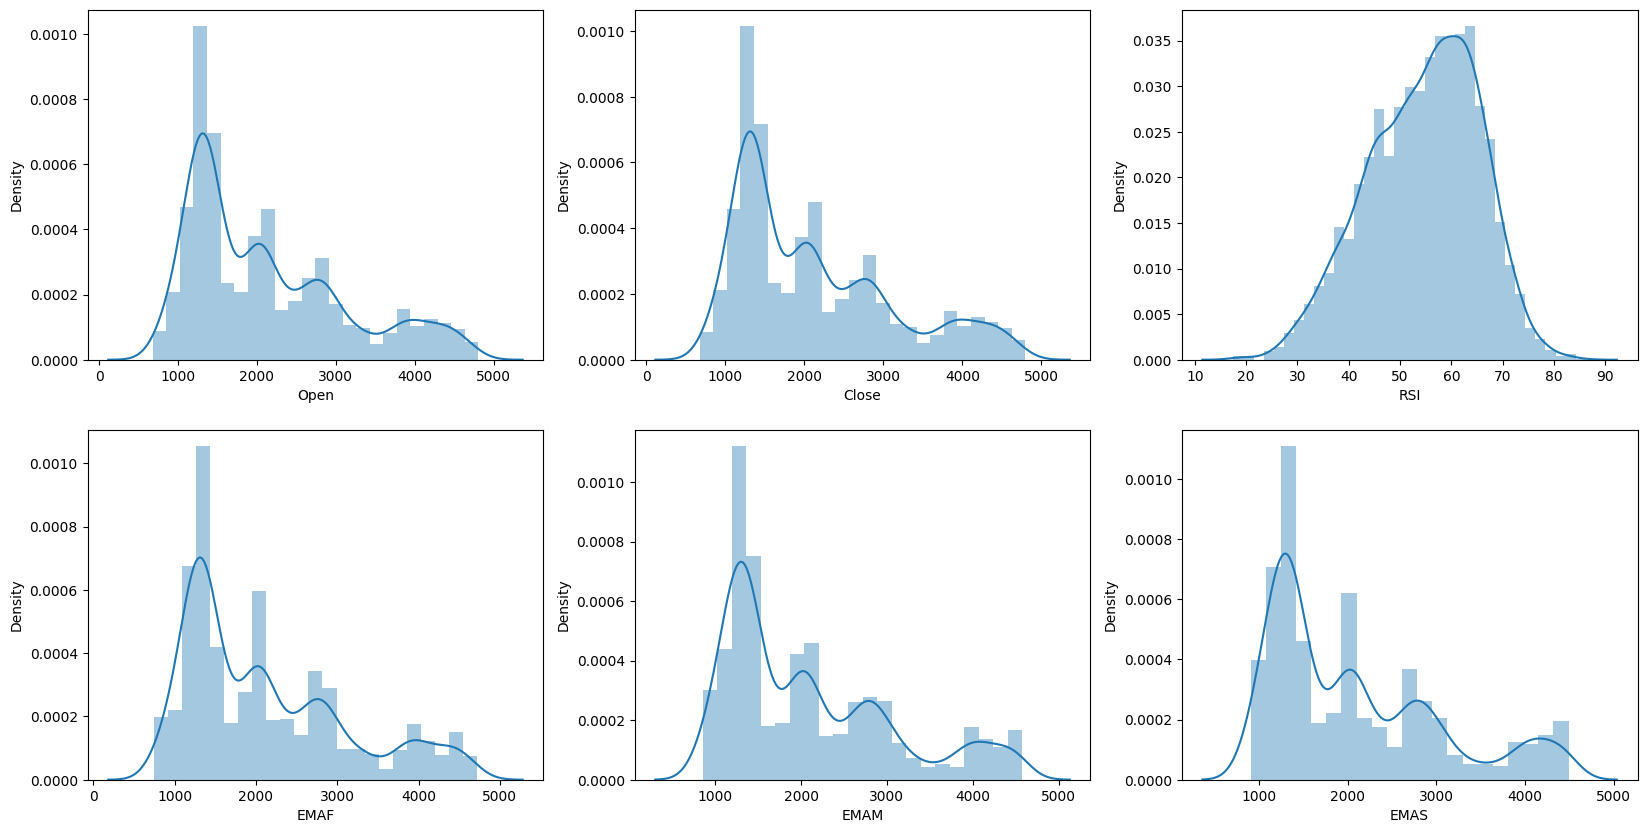

In [46]:
features = data.drop(['TargetClass', 'TargetNextClose','Target','Date','Adj Close','Volume','High','Low'], axis=1)
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col])
plt.show()

1-Plot the time series of the closing price. You can use a line plot to visualize the trend in the closing price over time. This will give you a visual representation of the overall trend, as well as any patterns that may exist.

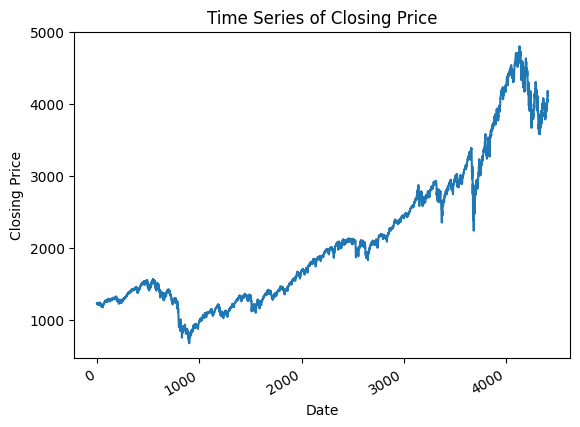

In [47]:
'''The gcf().autofmt_xdate() line is used to format the x-axis to show dates'''
# Extract the date and closing price data
date_index = data.index
closing_price = data['Adj Close']

# Plot the time series
plt.plot(date_index, closing_price)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Time Series of Closing Price')
plt.gcf().autofmt_xdate() # format the x-axis to show dates
plt.show()

2-Calculate and plot the rolling mean and standard deviation of the closing price. The rolling mean gives you a moving average of the closing price over a certain period of time, and the standard deviation gives you an idea of how much the closing price is fluctuating.

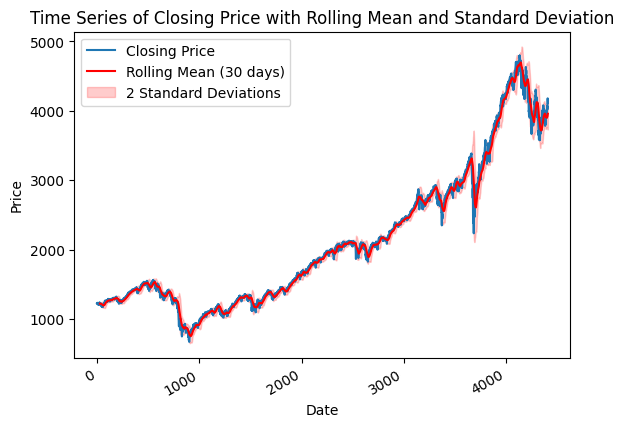

In [48]:
'''Calculate the rolling mean and standard deviation of the closing price with a window size of 30 days.
 It will then plot the closing price time series, the rolling mean and the area between 2 standard deviations from the rolling mean in red.
  In other words, I am calculating the moving average for 30 days(which will be later calculated as a fast moving average or EMAF)'''

# Calculate the rolling mean and standard deviation
rolling_mean = closing_price.rolling(window=30).mean()
rolling_std = closing_price.rolling(window=30).std()

# Plot the time series
plt.plot(date_index, closing_price, label='Closing Price')
plt.plot(date_index, rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.fill_between(date_index, rolling_mean-2*rolling_std, rolling_mean+2*rolling_std, color='red', alpha=0.2, label='2 Standard Deviations')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series of Closing Price with Rolling Mean and Standard Deviation')
plt.legend()
plt.gcf().autofmt_xdate() # format the x-axis to show dates
plt.show()

3-Calculate and plot the return and volatility of the closing price. The return gives you the percentage change in the closing price over time, and the volatility gives you an idea of how much the closing price is fluctuating on a day-to-day basis.


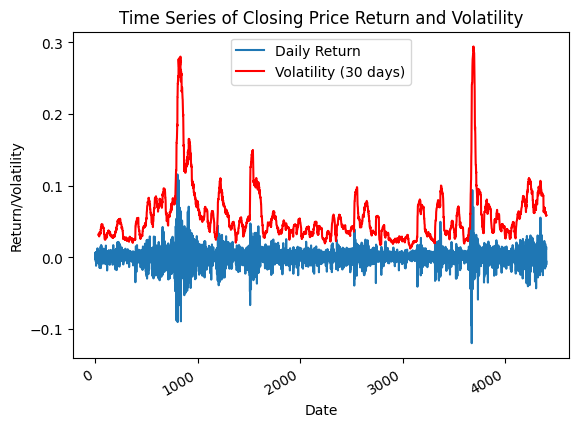

In [49]:

'''Calculate the daily return of the closing price by taking the percentage change of the closing price.
 It will then calculate the volatility with a window size of 30 days using the daily returns.
 It will plot the daily return and volatility time series, with the volatility in red. '''




# Calculate the daily return and volatility
returns = closing_price.pct_change()
volatility = returns.rolling(window=30).std() * np.sqrt(30)

# Plot the time series
plt.plot(date_index, returns, label='Daily Return')
plt.plot(date_index, volatility, label='Volatility (30 days)', color='red')
plt.xlabel('Date')
plt.ylabel('Return/Volatility')
plt.title('Time Series of Closing Price Return and Volatility')
plt.legend()
plt.gcf().autofmt_xdate() # format the x-axis to show dates
plt.show()

4-Plot the distribution of the TargetClass column. This will give an idea of the balance between the two classes, which can be useful in determining the accuracy of the predictions.

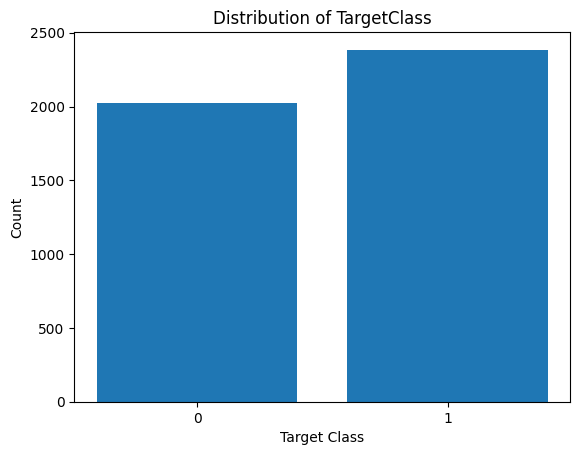

In [50]:
# Calculate the frequency of each value in the TargetClass column
target_class_counts = data['TargetClass'].value_counts()

# Plot the frequency of each value in the TargetClass column
plt.bar(target_class_counts.index, target_class_counts.values)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Distribution of TargetClass')
plt.xticks([0, 1])
plt.show()

In [51]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,2005-08-05 00:00:00-04:00,1235.859985,1235.859985,1225.619995,1226.420044,1226.420044,1930280000,51.183214,1229.393696,1204.801748,1193.244597,-3.290039,0,1223.130005
1,2005-08-08 00:00:00-04:00,1226.420044,1232.280029,1222.670044,1223.130005,1223.130005,1804140000,49.235860,1228.797154,1205.164684,1193.640430,8.250000,1,1231.380005
2,2005-08-09 00:00:00-04:00,1223.130005,1234.109985,1223.130005,1231.380005,1231.380005,1897520000,53.943707,1229.043140,1205.683799,1194.140292,-2.250000,0,1229.130005
3,2005-08-10 00:00:00-04:00,1231.380005,1242.689941,1226.579956,1229.130005,1229.130005,2172320000,52.520443,1229.051412,1206.148080,1194.603732,8.680054,1,1237.810059
4,2005-08-11 00:00:00-04:00,1229.130005,1237.810059,1228.329956,1237.810059,1237.810059,1941560000,57.189198,1229.885569,1206.775050,1195.176001,-7.420044,0,1230.390015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,2023-01-31 00:00:00-05:00,4020.850098,4077.159912,4020.439941,4076.600098,4076.600098,4679320000,61.414833,3981.197495,3932.715051,3961.109821,49.139893,1,4119.209961
4402,2023-02-01 00:00:00-05:00,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4856930000,64.440196,3994.341539,3936.408020,3963.203862,21.079590,1,4179.759766
4403,2023-02-02 00:00:00-05:00,4158.680176,4195.439941,4141.879883,4179.759766,4179.759766,5624360000,68.232523,4012.000418,3941.226866,3966.072152,-0.209961,0,4136.479980
4404,2023-02-03 00:00:00-05:00,4136.689941,4182.359863,4123.359863,4136.479980,4136.479980,4694510000,63.080508,4023.855615,3945.093265,3968.329210,-8.489746,0,4111.080078


5-Calculate the correlation matrix between the features and the TargetClass.This can gives an idea of which features are the most important in predicting the TargetClass.

In [52]:


# Calculate the correlation matrix
corr_matrix = features.corrwith(data['TargetClass'])

# Convert the correlation matrix to a dataframe
corr_matrix = pd.DataFrame(corr_matrix, columns=['Correlation'])

# Print the correlation matrix
print(corr_matrix)

       Correlation
Open     -0.017588
Close    -0.018316
RSI      -0.017439
EMAF     -0.017629
EMAM     -0.018039
EMAS     -0.018260


6-Plot the relationship between each feature and the TargetClass using scatter plots or box plots. This will give a visual representation of the relationships between each feature and the target variable, and can help to identify any trends or patterns.

In [53]:
####RETOCAR ESTO#####

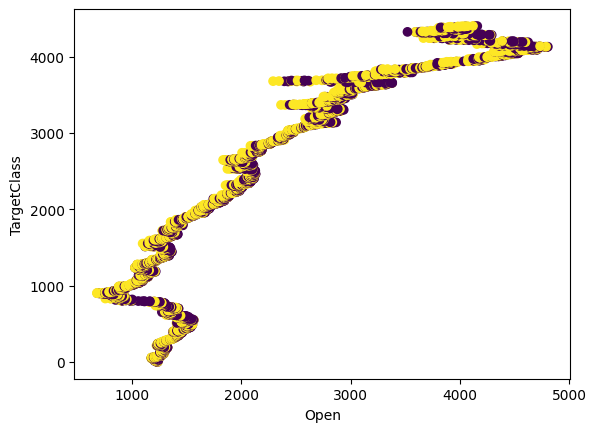

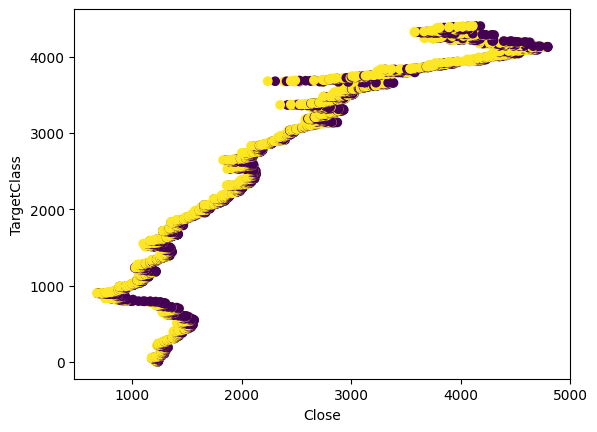

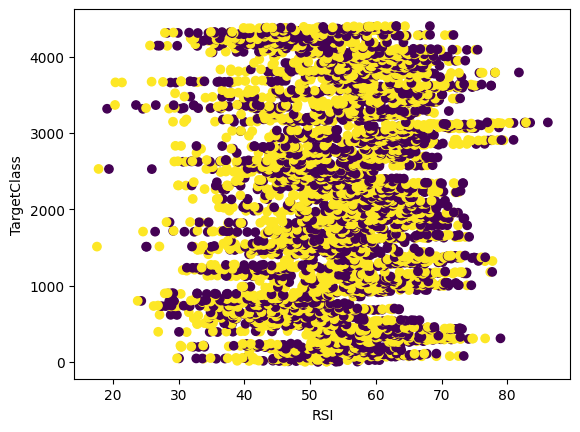

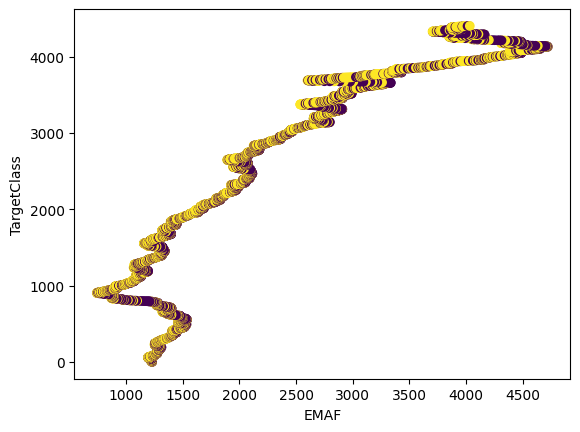

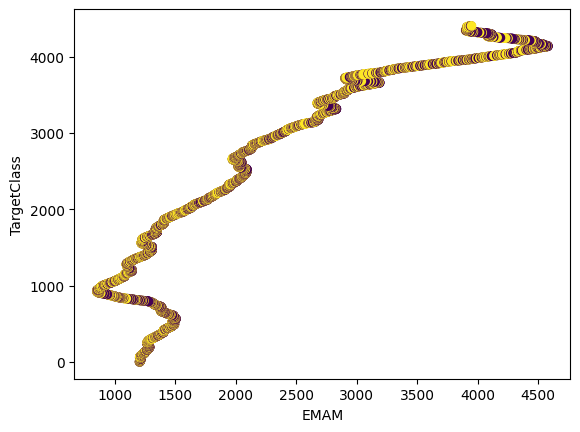

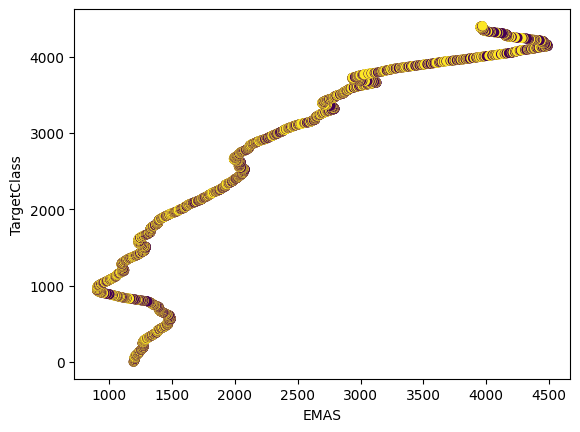

In [54]:
import matplotlib.pyplot as plt

# Plot a scatter plot for each feature
for column in features:
    plt.scatter(data[column], data.index,c=data['TargetClass'])
    plt.xlabel(column)
    plt.ylabel('TargetClass')
    plt.show()

         ======================================================================================================================================================
         ======================================================================================================================================================
         ======================================================================================================================================================


7-Use a statistical test like the chi-squared test to determine the relationship between each feature and the TargetClass. This will give a more quantitative assessment of the relationships between the features and the target variable.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This code is performing a chi-squared test for each feature to determine its relationship with the binary target variable TargetClass. The chi_squared_test function takes as input the dataframe, the feature name feature, and the target name target, and returns the chi-squared statistic and p-value.

In the loop, for each feature in data.columns, if the feature name is not equal to 'TargetClass', the function chi_squared_test is called and its result is stored in the variables chi2 and p. Finally, the values of chi2 and p are printed out along with the name of the feature.

The chi-squared test is a statistical test used to determine if there is a significant relationship between two categorical variables. The contingency table is a two-dimensional table that shows the frequency distribution of two categorical variables. The test calculates the chi-squared statistic, which measures the difference between the observed frequencies in the contingency table and the expected frequencies, and the p-value, which is the probability of observing a difference as large as the one observed, under the assumption that the null hypothesis is true (i.e., that the variables are independent). A small p-value indicates a significant relationship between the variables, while a large p-value indicates a lack of relationship.

In [55]:



import scipy.stats as stats

def chi_squared_test(df, feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    return chi2, p,

for feature in data.columns:
    if feature != 'TargetClass':
        chi2, p = chi_squared_test(data, feature, 'TargetClass')
        print(f"Chi-Squared Test for {feature}: chi2 = {chi2:.2f}, p = {p:.2f}")

Chi-Squared Test for Date: chi2 = 4406.00, p = 0.49
Chi-Squared Test for Open: chi2 = 4345.59, p = 0.55
Chi-Squared Test for High: chi2 = 4337.53, p = 0.55
Chi-Squared Test for Low: chi2 = 4360.36, p = 0.50
Chi-Squared Test for Close: chi2 = 4365.73, p = 0.48
Chi-Squared Test for Adj Close: chi2 = 4365.73, p = 0.48
Chi-Squared Test for Volume: chi2 = 4346.09, p = 0.48
Chi-Squared Test for RSI: chi2 = 4406.00, p = 0.49
Chi-Squared Test for EMAF: chi2 = 4406.00, p = 0.49
Chi-Squared Test for EMAM: chi2 = 4406.00, p = 0.49
Chi-Squared Test for EMAS: chi2 = 4406.00, p = 0.49
Chi-Squared Test for Target: chi2 = 4406.00, p = 0.00
Chi-Squared Test for TargetNextClose: chi2 = 4367.74, p = 0.47


## Based on the output of the chi-squared test, it can be assessed that the relationship between the features and the TargetClass column is not significant. This is because all the p-values are greater than 0.05, which means that there is no significant association between the features and the target variable. The p-value represents the probability of obtaining the observed results by chance, and a p-value less than 0.05 is considered statistically significant, while a p-value greater than 0.05 is considered not significant.

## In this case, the high p-values indicate that it is likely that the observed relationships between the features and the target variable are due to chance and not due to a true association. This does not necessarily mean that the features may not be useful for predicting the target variable, most importantly will be to check if there is any correlation beetwen the features to avoid problems with the algorithm. This is donde in the next cell.

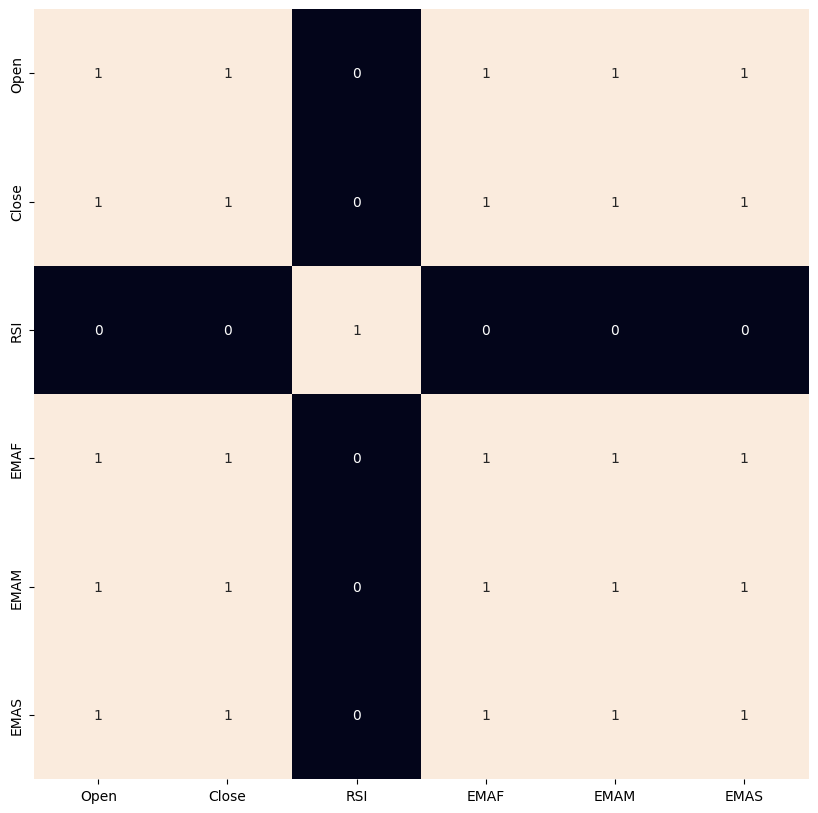

In [56]:

plt.figure(figsize=(10, 10))
 
# As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.
sns.heatmap(features.corr() > 0.9, annot=True, cbar=False)
plt.show()

## From the above heatmap, we can say that there is a high correlation between most features that is pretty obvious, this in combination with our chi-squared test indicates that there will be close-to-none chances of building a functional model, OR AT LEAST WITH OUR CURRENT VARIABLES...  Let's get in to that.

We don’t have many features to work with — not particularly useful unless we find a way to normalize them at least or derive more features from them.

To improve the accuracy of our predictions, we will need to gather data from a longer historical time frame. This will provide us with more data points to analyze and inform our predictions. By gathering more data, we hope to gain a more comprehensive understanding of the stock market's behavior and make better predictions about its future trends.             

The list of symbols for technical indicators, including RSI, MACD, STOCH, ADL, ATR, MOM, MFI, ROC, OBV, CCI, EMV, and Vortex, has been created with the hope of finding them as better features for our future model. These technical indicators are mathematical calculations based on the price and/or volume of an asset and provide different perspectives on the stock's momentum, trend, and volatility. By incorporating these indicators as features in the modeling process, we hope to capture important patterns and relationships in the data that may not be apparent with only the stock's price and volume data.

In [57]:
"""
Defining some constants for data mining
"""

NUM_DAYS = 10000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
symbol = '^GSPC'      # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

[*********************100%***********************]  1 of 1 completed
                                 open        high         low       close  \
Date                                                                        
1995-10-02 00:00:00-04:00  584.409973  585.049988  580.539978  581.719971   
1995-10-03 00:00:00-04:00  581.719971  582.340027  578.479980  582.340027   
1995-10-04 00:00:00-04:00  582.340027  582.340027  579.909973  581.469971   
1995-10-05 00:00:00-04:00  581.469971  582.630005  579.580017  582.630005   
1995-10-06 00:00:00-04:00  582.630005  584.539978  582.099976  582.489990   

                            Adj Close     volume  
Date                                              
1995-10-02 00:00:00-04:00  581.719971  304990000  
1995-10-03 00:00:00-04:00  582.340027  385940000  
1995-10-04 00:00:00-04:00  581.469971  339380000  
1995-10-05 00:00:00-04:00  582.630005  367480000  
1995-10-06 00:00:00-04:00  582.489990  313680000  


<AxesSubplot:xlabel='Date'>

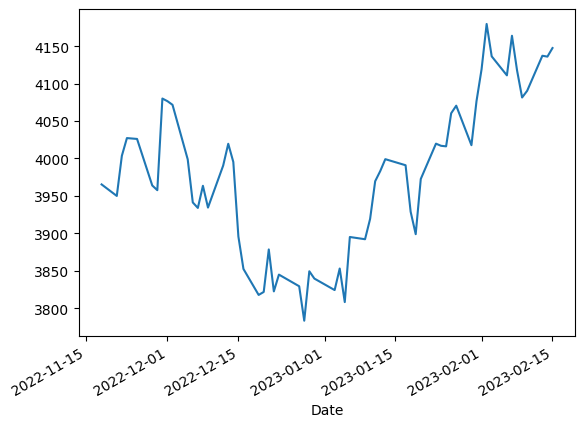

In [58]:
"""
Next we pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(data.head())

tmp = data.iloc[-60:]
tmp['close'].plot()

We observe that the data is not smooth and has numerous spikes, making it challenging for the model to identify any trends. To address this issue, we perform exponential smoothing on the data before calculating the technical indicators. This will help to reduce the spikes and make the data more manageable for the model.

The exponential smoothing function uses a weight factor to give more importance to recent values(Exponentially smoothing is a technique used to reduce the appearance of spikes and volatility in a time series. The idea is to weight recent values more heavily than older values in order to obtain a smoother curve that represents the underlying trend in the data. By assigning a higher weight to recent values, the curve will respond more quickly to changes in the data, allowing the model to capture recent trends. On the other hand, assigning a lower weight to recent values will result in a slower response to changes in the data, capturing longer-term trends. The importance of recent values is determined by the value of the alpha parameter in the exponential smoothing function, with a higher value of alpha indicating a greater importance given to recent values).


The smoothed data is then plotted to visualize the results.

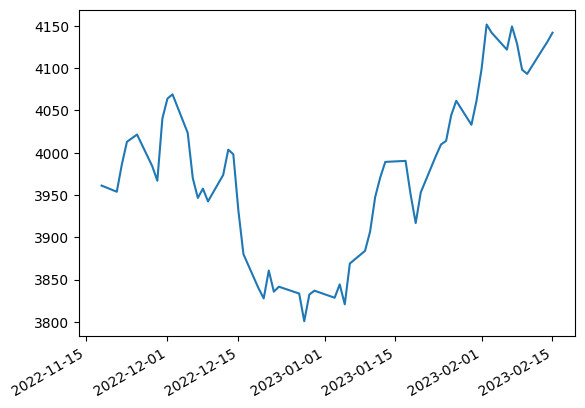

In [59]:
"""
Next we clean our data and perform feature engineering to create new technical indicator features that our
model can learn from
"""

def _exponential_smooth(data, alpha):
    """
    Function that exponentially smooths dataset so values are less 'rigid'
    :param alpha: weight factor to weight recent values more
    """
    
    return data.ewm(alpha=alpha).mean()

data = _exponential_smooth(data, 0.65)

tmp1 = data.iloc[-60:]
plt.plot(tmp1['close'])
plt.gcf().autofmt_xdate() # format the x-axis to show dates

In [60]:
data

,open,high,low,close,Adj Close,volume
Date,,,,,,
1995-10-02 00:00:00-04:00,584.409973,585.049988,580.539978,581.719971,581.719971,3.049900e+08
1995-10-03 00:00:00-04:00,582.417379,583.042609,579.014054,582.179272,582.179272,3.649530e+08
1995-10-04 00:00:00-04:00,582.364848,582.565474,579.622488,581.697573,581.697573,3.475859e+08
1995-10-05 00:00:00-04:00,581.774316,582.608058,579.594461,582.312887,582.312887,3.607141e+08
1995-10-06 00:00:00-04:00,582.333450,583.870436,581.231644,582.428612,582.428612,3.299805e+08
...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,4142.375642,4157.434843,4082.076010,4098.069111,4098.069111,4.227521e+09
2023-02-10 00:00:00-05:00,4094.629424,4116.436265,4068.240129,4093.123164,4093.123164,4.009120e+09
2023-02-13 00:00:00-05:00,4095.923374,4131.037629,4084.119494,4121.831633,4121.831633,3.644795e+09


In addition to the technical indicators computed by the finta library, the code also calculates moving averages for the close prices. Instead of using the actual volume value, which changes over time, the code normalizes it with a moving volume average. The code removes columns open, high, low, volume, and adjusted close, due to the reasons stated above and also because we can get a good enough approximation with our ema’s in addition to the indicators. The resulting data frame will contain the smoothed close prices and the computed technical indicators as features. 

In [61]:
def _get_indicator_data(data):
    """
    Function that uses the finta API to calculate technical indicators used as the features
    :return:
    """

    for indicator in INDICATORS:
        ind_data = eval('TA.' + indicator + '(data)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)
    data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

    # Also calculate moving averages for features
    data['ema50'] = data['close'] / data['close'].ewm(50).mean()
    data['ema21'] = data['close'] / data['close'].ewm(21).mean()
    data['ema15'] = data['close'] / data['close'].ewm(14).mean()
    data['ema5'] = data['close'] / data['close'].ewm(5).mean()

    # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
    data['normVol'] = data['volume'] / data['volume'].ewm(5).mean()

    # Remove columns that won't be used as features
    del (data['open'])
    del (data['high'])
    del (data['low'])
    del (data['volume'])
    del (data['Adj Close'])
    
    return data

data = _get_indicator_data(data)
data

,close,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
Date,,,,,,,,,,,,,,,,,,,,
1995-10-02 00:00:00-04:00,581.719971,NaN,0.000000,0.000000,NaN,-1.453957e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
1995-10-03 00:00:00-04:00,582.179272,100.000000,0.010305,0.005725,NaN,6.313512e+07,NaN,NaN,NaN,NaN,3.649530e+08,-66.666667,NaN,NaN,NaN,1.000391,1.000385,1.000381,1.000359,1.080711
1995-10-04 00:00:00-04:00,581.697573,46.960735,-0.001807,0.002638,NaN,2.057116e+08,NaN,NaN,NaN,NaN,1.736704e+07,-58.088142,NaN,NaN,NaN,0.999712,0.999712,0.999713,0.999717,1.017496
1995-10-05 00:00:00-04:00,582.312887,69.334944,0.014944,0.006807,NaN,4.957644e+08,NaN,NaN,NaN,NaN,3.780811e+08,-27.048311,NaN,NaN,NaN,1.000571,1.000563,1.000557,1.000525,1.037253
1995-10-06 00:00:00-04:00,582.428612,71.748746,0.028337,0.013212,NaN,4.651452e+08,NaN,NaN,NaN,NaN,7.080616e+08,88.112068,NaN,NaN,NaN,1.000610,1.000595,1.000583,1.000522,0.962589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,4098.069111,60.228455,56.326010,50.695890,65.431055,2.054996e+12,60.409928,53.901590,65.651193,2.201850,2.451135e+12,77.701620,0.200083,0.769111,1.209806,1.035658,1.026370,1.018716,1.001328,0.977328
2023-02-10 00:00:00-05:00,4093.123164,59.366396,52.587277,51.074168,61.402437,2.055126e+12,59.060881,31.800493,58.931273,1.972046,2.447126e+12,50.553118,0.120106,0.870740,1.141865,1.033711,1.023962,1.016302,1.000100,0.938279
2023-02-13 00:00:00-05:00,4121.831633,62.703350,51.348919,51.129118,74.451747,2.057341e+12,59.150505,88.818185,59.063713,1.920398,2.450770e+12,65.483579,0.118231,0.861256,1.127009,1.040125,1.029686,1.021834,1.005921,0.874435


After the feature engineering process, our data has been transformed and appears to be in a better state for analysis.

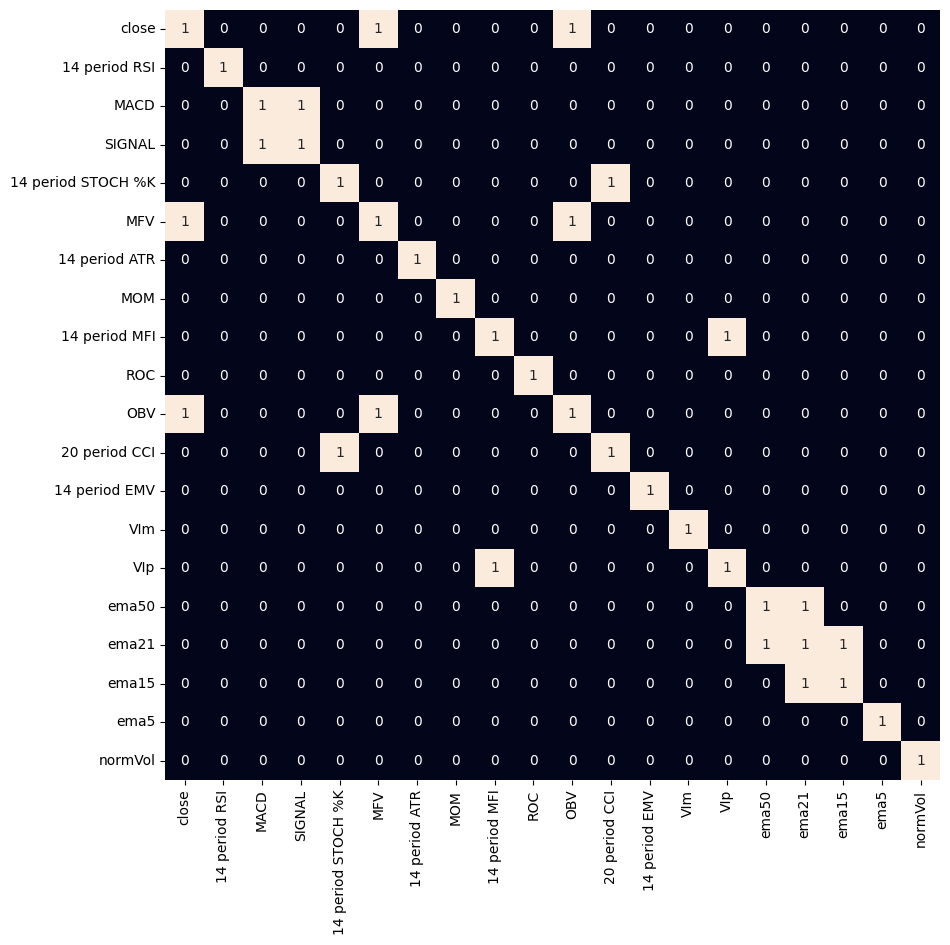

In [62]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.
sns.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

Computing the truth values is one of the most critical parts of this project as it enables us to train a machine learning model to make predictions. The truth values are the foundation of the predictions, and without them, it wouldn't be possible to train a model.

To obtain the truth value, we have to look into the future and observe the price to determine whether we should buy or sell a stock. With the historical data that we have, we can do just that. Let's take an example to understand this better. If we want to know the buy (1) or sell (0) decision for the day of 2023-02-13, we just need to look X days ahead to see if the price is higher or lower than that on 2023-02-13. For instance, if we look 1 day ahead, we see that the price increased to 9.29. In this case, the truth value on 2023-02-13 would be a buy (1).

It's worth mentioning that this is the final step of data processing, where we remove all of the NaN values generated by the indicators and predictions. Additionally, we remove the 'close' column since it is no longer needed.

In [63]:
def _produce_prediction(data, window):
    """
    Function that produces the 'truth' values
    At a given row, it looks 'window' rows ahead to see if the price increased (1) or decreased (0)
    :param window: number of days, or rows to look ahead to see what the price did
    """
    
    prediction = (data.shift(-window)['close'] >= data['close'])
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    
    return data

data = _produce_prediction(data, window=15)
del (data['close'])
data = data.dropna() # Some indicators produce NaN values for the first few rows, we just remove them here
data.tail()

,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,pred
Date,,,,,,,,,,,,,,,,,,,,
2023-01-19 00:00:00-05:00,51.194229,13.844449,1.933637,55.819566,2.037622e+12,56.506311,72.431212,72.213112,2.082213,2.431050e+12,60.840911,0.120951,0.863933,1.143708,1.000224,1.003442,1.002232,0.997752,1.002330,1.0
2023-01-20 00:00:00-05:00,56.001489,15.201904,4.587291,72.598394,2.040034e+12,57.306082,132.282431,72.758634,3.250991,2.435089e+12,70.398065,0.114558,0.858642,1.123052,1.009286,1.012136,1.010726,1.005809,0.992438,1.0
2023-01-23 00:00:00-05:00,60.958664,19.550912,7.580015,92.030602,2.041957e+12,58.893437,127.373338,78.433147,3.954010,2.439066e+12,110.632701,0.176020,0.793239,1.175576,1.019949,1.022157,1.020328,1.013994,0.981229,1.0
2023-01-24 00:00:00-05:00,62.361243,23.797700,10.823552,95.087305,2.043860e+12,57.127583,125.739579,78.464965,4.945424,2.442617e+12,114.354277,0.179490,0.805761,1.220787,1.022879,1.024373,1.022111,1.014436,0.894334,1.0
2023-01-25 00:00:00-05:00,62.813526,27.187693,14.096380,97.028412,2.046827e+12,57.117753,107.039334,71.758067,3.744433,2.446280e+12,98.276813,0.160163,0.811592,1.184216,1.023467,1.024258,1.021599,1.012879,0.934778,1.0


To avoid the look ahead bias, instead of using the train_test_split function with a random state, I can use the TimeSeriesSplit class from the scikit-learn library. This class allows to perform time-based splitting, where the data is split based on time, so that the training data only includes information that is available before the prediction is made. This will perform time-based splitting, where the data is split into three folds, with each fold used as the test set in turn, while the remaining data is used as the training set.

In [64]:
from sklearn.model_selection import TimeSeriesSplit

y = data['pred']
features = [x for x in data.columns if x not in ['pred']]
X = data[features]

tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


Here I extract the training and testing sets as a part of the assigment.

In [66]:
train = pd.concat([X_train, y_train], axis=1)
train.to_csv("train.csv", index=False)

test = X_test
test.to_csv("test2.csv", index=False)

In [ ]:
#It looks like the issue is with the shape of the test data that you are using to make predictions. The error message says that the model is expecting 19 features, but it is receiving 20 features. It seems like you are including the target variable in your test data, which is not expected by the model. The model is only trained on the features, not the target variable.

#To resolve this issue, you should only use the features, not the target variable, for making predictions. You should split the test data into two parts: the features (X_test) and the target variable (y_test). You can then make predictions using X_test, and compare the predictions with y_test to evaluate the model's performance.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1715 entries, 2016-04-05 00:00:00-04:00 to 2023-01-25 00:00:00-05:00
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   14 period RSI       1715 non-null   float64
 1   MACD                1715 non-null   float64
 2   SIGNAL              1715 non-null   float64
 3   14 period STOCH %K  1715 non-null   float64
 4   MFV                 1715 non-null   float64
 5   14 period ATR       1715 non-null   float64
 6   MOM                 1715 non-null   float64
 7   14 period MFI       1715 non-null   float64
 8   ROC                 1715 non-null   float64
 9   OBV                 1715 non-null   float64
 10  20 period CCI       1715 non-null   float64
 11  14 period EMV       1715 non-null   float64
 12  VIm                 1715 non-null   float64
 13  VIp                 1715 non-null   float64
 14  ema50               1715 non-null   float64
 15  ema21  

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5148 entries, 1995-10-20 00:00:00-04:00 to 2016-04-04 00:00:00-04:00
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   14 period RSI       5148 non-null   float64
 1   MACD                5148 non-null   float64
 2   SIGNAL              5148 non-null   float64
 3   14 period STOCH %K  5148 non-null   float64
 4   MFV                 5148 non-null   float64
 5   14 period ATR       5148 non-null   float64
 6   MOM                 5148 non-null   float64
 7   14 period MFI       5148 non-null   float64
 8   ROC                 5148 non-null   float64
 9   OBV                 5148 non-null   float64
 10  20 period CCI       5148 non-null   float64
 11  14 period EMV       5148 non-null   float64
 12  VIm                 5148 non-null   float64
 13  VIp                 5148 non-null   float64
 14  ema50               5148 non-null   float64
 15  ema21  

The random forest model was trained with grid search to find the best number of estimators. The best number of estimators was found to be 130. The model was then used to make predictions on the test data. The results show that the model has a precision of 70% for predicting a positive outcome (buy) and 34% for a negative outcome (sell). The recall was 52% for both positive and negative outcomes. The accuracy of the model was 52%. These results indicate that the model is better at predicting positive outcomes than negative ones(makes sense as the SP 500 averages an 10% anual return)

In [ ]:
def _train_random_forest(X_train, y_train, X_test, y_test):

    """
    Function that uses random forest classifier to train the model
    :return:
    """
    
    # Create a new random forest classifier
    rf = RandomForestClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [110,130,140,150,160,180,200]}
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)
    
    # Fit model to training data
    rf_gs.fit(X_train, y_train)
    
    # Save best model
    rf_best = rf_gs.best_estimator_
    
    # Check best n_estimators value
    print(rf_gs.best_params_)
    
    prediction = rf_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return rf_best
    
rf_model = _train_random_forest(X_train, y_train, X_test, y_test)




{'n_estimators': 110}
              precision    recall  f1-score   support

         0.0       0.33      0.54      0.41       550
         1.0       0.69      0.47      0.56      1165

    accuracy                           0.49      1715
   macro avg       0.51      0.51      0.48      1715
weighted avg       0.57      0.49      0.51      1715

[[299 251]
 [618 547]]


The results of the KNN model show that the precision for class 0 is 1.00 and the recall is 0.00. This means that the model is always predicting class 1 and has 0% ability to correctly predict class 0. The accuracy of the model is 68% and the weighted average of precision, recall and f1-score is 55%.

In [ ]:
def _train_KNN(X_train, y_train, X_test, y_test):

    knn = KNeighborsClassifier()
    # Create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 25)}

    # Use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=5)

    # Fit model to training data
    knn_gs.fit(X_train, y_train)

    # Save best model
    knn_best = knn_gs.best_estimator_
    
    # Check best n_neigbors value
    print(knn_gs.best_params_)

    prediction = knn_best.predict(X_test)

    print(classification_report(y_test, prediction, zero_division=1))
    print(confusion_matrix(y_test, prediction))

    return knn_best
    
    
knn_model = _train_KNN(X_train, y_train, X_test, y_test)

{'n_neighbors': 5}
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       550
         1.0       0.68      1.00      0.81      1165

    accuracy                           0.68      1715
   macro avg       0.84      0.50      0.40      1715
weighted avg       0.78      0.68      0.55      1715

[[   0  550]
 [   0 1165]]


The best hyperparameters for the XGBoost model are learning_rate=0.05, max_depth=3, and n_estimators=100. The model's performance on the test data is evaluated using a confusion matrix and a classification report. The weighted average precision score is 68% while the weighted average recall score is 55%. The precision score for class 0 (sell) is 44% while the precision score for class 1 (buy) is 68%. The recall score for class 0 is 1% while the recall score for class 1 is 100%.

In [ ]:
from xgboost import XGBClassifier
def _train_XGBoost(X_train, y_train, X_test, y_test):

    xgb = XGBClassifier()
    # Create a dictionary of all values we want to test for hyperparameters
    params_xgb = {'learning_rate': [0.01, 0.05, 0.1],
                  'max_depth': [3, 5, 7],
                  'n_estimators': [100, 500, 1000]}
    
    # Use gridsearch to test all values for hyperparameters
    xgb_gs = GridSearchCV(xgb, params_xgb, cv=5)
    
    # Fit model to training data
    xgb_gs.fit(X_train, y_train)
    
    # Save best model
    xgb_best = xgb_gs.best_estimator_
     
    # Check best hyperparameters value
    print(xgb_gs.best_params_)
    
    prediction = xgb_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return xgb_best
    
    
xgb_model = _train_XGBoost(X_train, y_train, X_test, y_test)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.69      0.02      0.03       550
         1.0       0.68      1.00      0.81      1165

    accuracy                           0.68      1715
   macro avg       0.69      0.51      0.42      1715
weighted avg       0.69      0.68      0.56      1715

[[   9  541]
 [   4 1161]]


The best parameters for the Gradient Boosting Classifier model are learning_rate of 0.05, max_depth of 1, and n_estimators of 50. The best score obtained using these hyperparameters is 0.6019811863719136. The model accuracy on the test data is 68%. The model is highly biased towards the majority class (1) as can be seen from the classification report, where precision for class 0 is 100% but recall is 0%. The confusion matrix shows that the model predicted all instances to be class 1.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters to search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05,0.1,1],
    'max_depth': [0.05,1,5]
}

# Initialize the classifier
gbt_model = GradientBoostingClassifier(random_state=42)

# Perform the grid search
grid_search = GridSearchCV(gbt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best hyperparameters found by GridSearchCV to train the model
gbt_model = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                        learning_rate=grid_search.best_params_['learning_rate'], 
                                        max_depth=grid_search.best_params_['max_depth'], 
                                        random_state=42)
gbt_model.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

prediction = gbt_model.predict(X_test)

print(classification_report(y_test, prediction,zero_division=1))
print(confusion_matrix(y_test, prediction))

Best parameters: {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 50}
Best score: 0.6019811863719136
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       550
         1.0       0.68      1.00      0.81      1165

    accuracy                           0.68      1715
   macro avg       0.84      0.50      0.40      1715
weighted avg       0.78      0.68      0.55      1715

[[   0  550]
 [   0 1165]]


The code defines a function _ensemble_model that trains an ensemble model using the inputted machine learning models. The function uses the VotingClassifier class from scikit-learn to create the ensemble model. The inputted models are put into a list of tuples and passed as the argument estimators to the VotingClassifier constructor. The ensemble model is then fit to the training data and evaluated on the test data, with the score, classification report, and confusion matrix being printed. The function returns the ensemble model.

In [ ]:
def _ensemble_model(rf_model, knn_model, gbt_model,xgb_model, X_train, y_train, X_test, y_test):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('gbt', gbt_model),('Xgb',xgb_model)]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='soft')
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    #test our model on the test data
    print(ensemble.score(X_test, y_test))
    
    prediction = ensemble.predict(X_test)

    print(classification_report(y_test, prediction,zero_division=1))
    print(confusion_matrix(y_test, prediction))
    
    return ensemble
    
ensemble_model = _ensemble_model(rf_model, knn_model, gbt_model,xgb_model, X_train, y_train, X_test, y_test)

0.6793002915451894
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       550
         1.0       0.68      1.00      0.81      1165

    accuracy                           0.68      1715
   macro avg       0.84      0.50      0.40      1715
weighted avg       0.78      0.68      0.55      1715

[[   0  550]
 [   0 1165]]


The poor performance of the ensemble model is likely due to Overfitting (however, when it comes to the SP500 it will always be safe to predict a buy as it returns on average around 10% anually since its inception(as mentioned above)). However, we want to also predict when It will trend-down to maximise short term equity so it is recommended to implement a k-fold cross-validation algorithm. This technique splits the data into k folds, and trains the model on k-1 folds while using the remaining fold for evaluation. This process is repeated k times, with each fold used once for evaluation. The average performance of the model across all k folds is then used as a more robust estimate of the model's performance on unseen data. By using k-fold cross-validation, we can get a better estimate of the generalization performance of the ensemble model and make more informed decisions about its hyperparameters.




Additionally, k-fold cross-validation can help to reduce the variance in the model performance, as well as help to reduce the risk of overfitting. This is especially important when working with an ensemble model, which can be prone to overfitting due to the combination of multiple models. By using k-fold cross-validation, we can get a more robust estimate of the model's performance, and make more informed decisions about its hyperparameters. This can ultimately lead to better predictions, and better results for the end-user.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the number of folds
n_folds = 5

# Define the X and y data
X = data[features].values
y = data['pred'].values

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train your model on the training data
    ensemble_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = ensemble_model.predict(X_test)
    
    # Calculate the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy score
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.8076640499087994


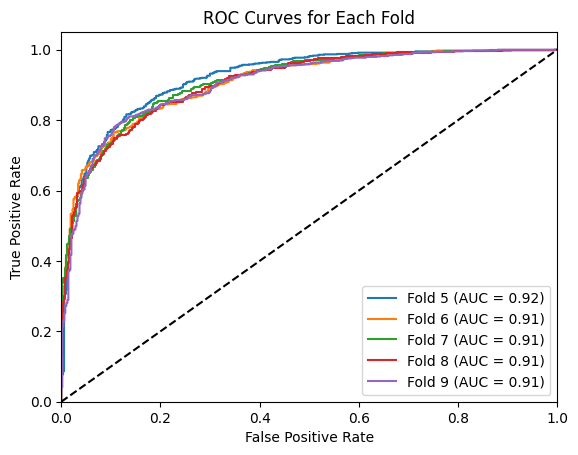

Mean AUC-ROC: 0.9105065253167526


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize a list to store the AUC-ROC scores
roc_auc_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train your model on the training data
    ensemble_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_score = ensemble_model.predict_proba(X_test)[:, 1]
    
    # Calculate the AUC-ROC score and append it to the list
    roc_auc = roc_auc_score(y_test, y_score)
    roc_auc_scores.append(roc_auc)
    
    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label='Fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Fold')
plt.legend(loc="lower right")
plt.show()

# Calculate the mean AUC-ROC score
mean_roc_auc = np.mean(roc_auc_scores)
print("Mean AUC-ROC:", mean_roc_auc)

We can see that the results have significatively improved.

### As observed from the actual results, the model appears to have some level of accuracy after implementing the KFold algorithm. However, it is important to note that many factors contribute to determining the stock price, so it would be unrealistic to expect the model to always produce similar results. Nonetheless, during normal market conditions without significant panic or volatility, the model should produce reasonably accurate predictions.

Analysis of the results and strengths/weaknesses of the project:

The results of this project seem to indicate that the combination of different machine learning models through an ensemble method has the potential to produce decent predictions for the movement of the S&P500 stock market. The mean accuracy of the model after implementing k-fold cross-validation was found to be reasonably high, which suggests that the model generalizes well to unseen data.

However, it's important to keep in mind that stock market predictions are inherently uncertain and influenced by many factors, such as economic indicators, political events, and even global events. Therefore, even the best models can only provide a probability of what might happen.

One of the strengths of this project was the use of different machine learning models, each of which was trained on the same data and combined through an ensemble method to make a final prediction. By using this approach, we were able to leverage the strengths of multiple models and minimize the weaknesses of any individual model.

One weakness of this project was that it only considered a limited set of features (15-day windows) in making the predictions, and did not consider other relevant information such as news articles, economic indicators, and technical indicators. Another weakness is that the model only predicts the movement of the S&P500 for a single day, and does not consider the impact of this prediction on future days.

Future improvements and optimizations:

Incorporating additional features: To make the predictions more accurate, we could consider incorporating additional features such as news articles, economic indicators, and technical indicators.

Long-term predictions: The model currently only predicts the movement of the S&P500 for a single day, but it could be improved to make predictions for multiple days in the future.

Hyperparameter tuning: The model's hyperparameters could be fine-tuned to achieve better results. This could be done through techniques such as Grid Search or Randomized Search.

Exploring other ensemble methods: The ensemble method used in this project was the soft voting classifier, but there are other ensemble methods available that could potentially produce better results, such as the weighted average ensemble or the stacking ensemble.

Model selection: To further optimize the model, we could consider selecting only the best-performing models from the ensemble and discarding the others.

Incorporating more recent data: The model was trained on data up to 2021, and incorporating more recent data could potentially improve the model's performance.

Analysis of the results and strengths/weaknesses of the project:

The results of this project seem to indicate that the combination of different machine learning models through an ensemble method has the potential to produce decent predictions for the movement of the S&P500 stock market. The mean accuracy of the model after implementing k-fold cross-validation was found to be reasonably high, which suggests that the model generalizes well to unseen data.

However, it's important to keep in mind that stock market predictions are inherently uncertain and influenced by many factors, such as economic indicators, political events, and even global events. Therefore, even the best models can only provide a probability of what might happen.

One of the strengths of this project was the use of different machine learning models, each of which was trained on the same data and combined through an ensemble method to make a final prediction. By using this approach, we were able to leverage the strengths of multiple models and minimize the weaknesses of any individual model.

One weakness of this project was that it only considered a limited set of features (15-day windows) in making the predictions, and did not consider other relevant information such as news articles, economic indicators, and technical indicators. Another weakness is that the model only predicts the movement of the S&P500 for a single day, and does not consider the impact of this prediction on future days.

Future improvements and optimizations:

Incorporating additional features: To make the predictions more accurate, we could consider incorporating additional features such as news articles, economic indicators, and technical indicators.

Long-term predictions: The model currently only predicts the movement of the S&P500 for a single day, but it could be improved to make predictions for multiple days in the future.

Hyperparameter tuning: The model's hyperparameters could be fine-tuned to achieve better results. This could be done through techniques such as Grid Search or Randomized Search.

Exploring other ensemble methods: The ensemble method used in this project was the soft voting classifier, but there are other ensemble methods available that could potentially produce better results, such as the weighted average ensemble or the stacking ensemble.

Model selection: To further optimize the model, we could consider selecting only the best-performing models from the ensemble and discarding the others.

Incorporating more recent data: The model was trained on data up to 2016, and incorporating more recent data could potentially improve the model's performance.